In [74]:
import pandas as pd
from opytex import texenv
%matplotlib inline

# Informations sur le devoir

In [75]:
ds_name = 'DST_04'
classe = 'tstmg'

latex_info = {}
latex_info['titre'] = 'DST 04' 
latex_info['classe'] = '\\TSTMG'
latex_info['date'] = '16 mai 2015'
latex_info

{'classe': '\\TSTMG', 'date': '16 mai 2015', 'titre': 'DST 04'}

# Import et premiers traitements

In [76]:
notes = pd.ExcelFile("./../../../notes_"+classe+".xls")
notes.sheet_names
notes = notes.parse(ds_name)

In [77]:
notes.index

Index(['DST_04', 'av_arrondi', 'Exercice 1', 'QCM', '1.1', '1.2', 'Exercice 2',
       '2.A.1', '2.A.2', '2.A.3.a', '2.A.3.b', '2.A.3.c', '2.B.1', '2.B.2',
       'Exercice 3', '3.A.1', '3.A.2', '3.B.1', '3.B.2', '3.B.3', 'Exercice 4',
       '4.A.1', '4.A.1.a', '4.A.1.b', '4.B.1', '4.B.2', '4.B.3'],
      dtype='object')

In [78]:
notes = notes.T

In [79]:
notes = notes.drop('av_arrondi', axis=1)
#notes = notes.drop('num_sujet', axis=1)

In [80]:
barem = notes[:1]
notes = notes[1:]
#notes

## Supression des notes inutiles 

In [81]:
notes = notes[notes[ds_name].notnull()]
notes = notes[notes[ds_name] != 0]

In [82]:
notes = notes.astype(float)

## Traitement des notes

In [83]:
notes.T.index

Index(['DST_04', 'Exercice 1', 'QCM', '1.1', '1.2', 'Exercice 2', '2.A.1',
       '2.A.2', '2.A.3.a', '2.A.3.b', '2.A.3.c', '2.B.1', '2.B.2',
       'Exercice 3', '3.A.1', '3.A.2', '3.B.1', '3.B.2', '3.B.3', 'Exercice 4',
       '4.A.1', '4.A.1.a', '4.A.1.b', '4.B.1', '4.B.2', '4.B.3'],
      dtype='object')

In [84]:
list_exo = ["Exercice 1", "Exercice 2", "Exercice 3", "Exercice 4"]

In [85]:
notes[list_exo] = notes[list_exo].applymap(lambda x:round(x,2))
#notes[list_exo]

In [86]:
item_avec_note = list_exo + [ds_name,  "QCM"]
sous_exo = [i for i in notes.T.index if i not in item_avec_note]
sous_exo

['1.1',
 '1.2',
 '2.A.1',
 '2.A.2',
 '2.A.3.a',
 '2.A.3.b',
 '2.A.3.c',
 '2.B.1',
 '2.B.2',
 '3.A.1',
 '3.A.2',
 '3.B.1',
 '3.B.2',
 '3.B.3',
 '4.A.1',
 '4.A.1.a',
 '4.A.1.b',
 '4.B.1',
 '4.B.2',
 '4.B.3']

In [87]:
def toRepVal(val):
    if pd.isnull(val):
        return "\\NoRep"
    elif val == 0:
        return "\\RepZ"
    elif val == 1:
        return "\\RepU"
    elif val == 2:
        return "\\RepD"
    elif val == 3:
        return "\\RepT"
    else:
        return val

In [88]:
notes[item_avec_note] = notes[item_avec_note].fillna(".")
#notes

In [89]:
eleves = notes.copy()
eleves[sous_exo] = notes[sous_exo].applymap(toRepVal)

In [90]:
len(notes.T.index)

26

# Preparation du fichier .tex

In [91]:
bilan = texenv.get_template("tpl_bilan.tex")
with open("./bilan.tex","w") as f:
    f.write(bilan.render(eleves = eleves, barem = barem, ds_name = ds_name, latex_info = latex_info, nbr_questions = len(barem.T)))

# Un peu de statistiques

In [92]:
notes[ds_name].describe()

count    20.000000
mean     11.425000
std       4.733072
min       3.000000
25%       8.500000
50%      10.750000
75%      15.125000
max      20.000000
Name: DST_04, dtype: float64

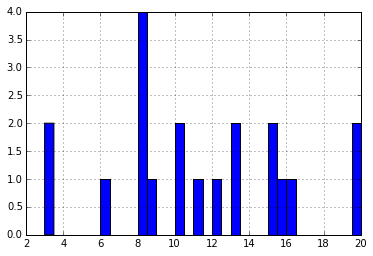

In [34]:
notes_seules = notes[ds_name]
notes_seules.hist(bins = (notes_seules.max() - notes_seules.min())*2)

In [35]:
notes_questions = notes[sous_exo]
notes_analysis = notes_questions.describe()

In [36]:
# J'aimerai récupérer le nom des questions qui ont été le moins répondus
notes_analysis[:1][notes_analysis[:1] == 25]

1.1  1.2  2.A.1  2.A.2  2.A.3.a  2.A.3.b  2.A.3.c  2.B.1  2.B.2  3.A.1  \
count  NaN  NaN    NaN    NaN      NaN      NaN      NaN    NaN    NaN    NaN   

       3.A.2  3.B.1  3.B.2  3.B.3  4.A.1  4.A.1.a  4.A.1.b  4.B.1  4.B.2  \
count    NaN    NaN    NaN    NaN    NaN      NaN      NaN    NaN    NaN   

       4.B.3  
count    NaN